# Lab 5: Measuring the Influence



In this notebook we test some the measures discussed in Lecture 5. 

If you are interested in additional background info on these measures, check out Chapter 7 of Mark Newmann, *Networks: An Introduction* (Oxford 2010). See: https://archive.org/details/networksintroduc0000newm 

In [ ]:

import networkx as nx
import numpy as np
# For this exercise you need `scipy` and `pygraphviz` installed, or you will have to delete the sections of the code refering to them. 
# Make sure you install them in the correct env you created for our class. 


## Example 1: Centrality in undirected network
### Example 1.1: Degree centrality


Last week (Lab4) we learned how to mathematically identify Hamlet as a hub in the dialogue network of characters in Shakespeare's *Hamlet*.

To do so we searched for a node with the highest degree(and the hightest degree centrality (which is normalised degree measure)). 

Let's create a simple undirected network:


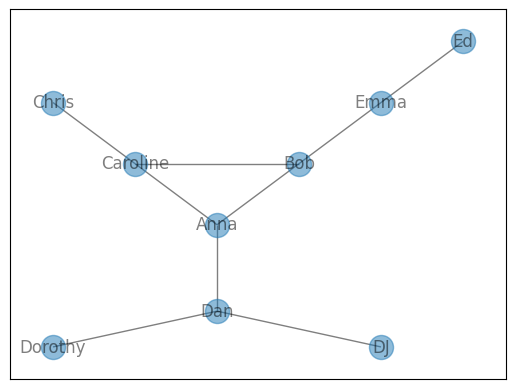

In [2]:
relationships = [
    ["Anna", "Bob"],
    ["Anna", "Caroline"],
    ["Anna", "Dan"],
    ["Bob", "Caroline"],
    ["Caroline", "Chris"],
    ["Bob", "Emma"],
    ["Emma", "Ed"],
    ["Dan", "Dorothy"],
    ["Dan", "DJ"],
    ]

G = nx.Graph()
G.add_edges_from(relationships)
pos = nx.nx_agraph.graphviz_layout(G, prog="twopi") # Requires pygraphviz installed
nx.draw_networkx(G, pos, alpha=0.5) #alpha defines the transparency of nodes. 

Let's find out who is the hub in our network by using degree and degree centrality (normalised degree ):

In [3]:
G_dc = nx.degree_centrality(G)
print("Degree centrality of all nodes in G (G_dc):", G_dc)

G_degree = dict(G.degree())
print("The degrees of all nodes in the network G are", G_degree)

G_highest_degreen_centr_node = max(G.nodes, key=G_dc.get)
print("The node with the highest degree centrality value in G is:", G_highest_degreen_centr_node)
print("Remember to not us max(G_dc) as the result will be:" , max(G_dc))

highest_degree_node =  max(G.nodes, key=G_degree.get)
print("The highest degree node is:", highest_degree_node)
print("Remember not to use simply max function as the answer will be:", max(G.degree))



Degree centrality of all nodes in G (G_dc): {'Anna': 0.375, 'Bob': 0.375, 'Caroline': 0.375, 'Dan': 0.375, 'Chris': 0.125, 'Emma': 0.25, 'Ed': 0.125, 'Dorothy': 0.125, 'DJ': 0.125}
The degrees of all nodes in the network G are {'Anna': 3, 'Bob': 3, 'Caroline': 3, 'Dan': 3, 'Chris': 1, 'Emma': 2, 'Ed': 1, 'Dorothy': 1, 'DJ': 1}
The node with the highest degree centrality value in G is: Anna
Remember to not us max(G_dc) as the result will be: Emma
The highest degree node is: Anna
Remember not to use simply max function as the answer will be: ('Emma', 2)


Great, so Anna is the hub, right? 

Or is there somethings suspicious here? 
...

...

...

*look at the graph above*

...

...

...

*look at the numbers of all the nodes*

...

...

...

Yes, Anna has the same degree (and normalised degree centrality) as a few other nodes in the network (for example Bob and Caroline). 

Let's fix it:

In [4]:
max_centrality = max(G_dc.values())
highest_degree_central_nodes = []
for node, centrality in G_dc.items():
    if centrality == max_centrality:
        highest_degree_central_nodes.append(node)
    print(highest_degree_central_nodes)   

print("The nodes with the highest degree centrality are:", highest_degree_central_nodes)

['Anna']
['Anna', 'Bob']
['Anna', 'Bob', 'Caroline']
['Anna', 'Bob', 'Caroline', 'Dan']
['Anna', 'Bob', 'Caroline', 'Dan']
['Anna', 'Bob', 'Caroline', 'Dan']
['Anna', 'Bob', 'Caroline', 'Dan']
['Anna', 'Bob', 'Caroline', 'Dan']
['Anna', 'Bob', 'Caroline', 'Dan']
The nodes with the highest degree centrality are: ['Anna', 'Bob', 'Caroline', 'Dan']


The same can be expressed in the following way:

In [5]:
max_centrality = max(G_dc.values())
highest_degree_central_nodes = [node for node, centrality in G_dc.items() if centrality == max_centrality]
print(highest_degree_central_nodes)

['Anna', 'Bob', 'Caroline', 'Dan']


Fine, so now we know that Anna, Bob, Caroline and Dan are equally important, but are they really? 
Let's test some of the measures we've learned today. 

### Exercise 1.2:  Eigenvector Centrality in undirected network

Before we move to measuring eigenvector centrality, let's look at the matrix underlying our graph. We use the `adjacency_matrix` function for this: 


In [6]:
A = nx.adjacency_matrix(G)
B = A.toarray()
print(B)



[[0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]
 [0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]]


From there we can calculate eigenvalues and eigenvectors for our matrix (or rather array) using `linalg` (lineal algebra) function from `numpy`. 

In [7]:

eigenvalues, eigenvectors = np.linalg.eig(B)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


Eigenvalues: [ 2.49242715e+00  1.50360690e+00  1.06885919e+00 -1.94804474e+00
 -1.72607493e+00 -1.13171240e+00 -5.14219411e-01  2.55158246e-01
  1.31843716e-33]
Eigenvectors: [[ 5.22916359e-01  1.07185110e-01  1.28049320e-01  5.41731543e-01
  -7.57121502e-02  2.12112011e-01 -4.75928544e-01 -3.57726607e-01
   2.96739974e-18]
 [ 5.03221687e-01 -2.66603134e-01 -7.81226890e-02 -2.96266548e-01
  -5.37563249e-01 -9.27672343e-02  4.22847610e-01 -3.24705364e-01
   2.53936069e-18]
 [ 4.90690633e-01 -1.90113923e-01  3.74593233e-01 -1.71090380e-01
   5.34805615e-01 -4.81043356e-01 -3.71071896e-02  1.86254371e-01
  -3.07892054e-17]
 [ 3.09418610e-01  6.17881328e-01 -1.59603851e-01 -5.87960354e-01
   1.33442478e-01  3.33760798e-01 -1.41008724e-01  4.71740988e-02
   2.82498447e-17]
 [ 1.96872608e-01 -1.26438581e-01  3.50460788e-01  8.78267203e-02
  -3.09839165e-01  4.25057954e-01  7.21621720e-02  7.29956309e-01
  -1.85199913e-17]
 [ 2.40636403e-01 -3.17937498e-01 -5.86144707e-01  2.06499328e-01
   4

We won't code the matrix calculation by hand here, as it requires us to not only know the eigenvalue, but also remember about iterations and tolerances. 

Instead we will use the NetworkX functions
-  `eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)` (documented here: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html).
- `eigenvector_centrality_numpy(G, weight=None, max_iter=50, tol=0)` (documented here: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality_numpy.html).

If you want to test these NetworkX functions feel free to give it a go.

You might want to check these videos to help you out refreshing how matrix multiplication works: 

- Shreesudha Kembhavi, EigenVector Centrality & Katz Centrality,  https://www.youtube.com/watch?v=-LO9NLaccFQ

- Natarajan Meghanathan, Eigenvector Centrality, https://www.youtube.com/watch?v=AjacGClQ56o

In [8]:
G_ec_n = nx.eigenvector_centrality_numpy(G) 
print("Eigenvector centrality of all nodes in G:", G_ec_n)
max_centrality = max(G_ec_n.values())
print("Max EC value is:", max_centrality)
highest_EC_nodes = [node for node, centrality in G_ec_n.items() if centrality == max_centrality]
print("The nodes with highest EC in G are: ", highest_EC_nodes)
print("Remember to not use max(G_ec) as the result will be:" , max(G_ec_n))


Eigenvector centrality of all nodes in G: {'Anna': 0.522916359234866, 'Bob': 0.5032216872162681, 'Caroline': 0.490690632782685, 'Dan': 0.30941860988815856, 'Chris': 0.19687260796273662, 'Emma': 0.2406364026595713, 'Ed': 0.09654701556803949, 'Dorothy': 0.12414349207245755, 'DJ': 0.12414349207245755}
Max EC value is: 0.522916359234866
The nodes with highest EC in G are:  ['Anna']
Remember to not use max(G_ec) as the result will be: Emma


In [9]:
G_ec = nx.eigenvector_centrality(G)
print("Eigenvector centrality of all nodes in G:", G_ec)
max_centrality = max(G_ec.values())
print("Max EC value is:", max_centrality)
highest_EC_nodes = [node for node, centrality in G_ec.items() if centrality == max_centrality]
print("The nodes with highest EC in G are: ", highest_EC_nodes)
print("Remember to not use max(G_ec) as the result will be:" , max(G_ec))


Eigenvector centrality of all nodes in G: {'Anna': 0.5229171749788479, 'Bob': 0.5032196467946493, 'Caroline': 0.4906891574309109, 'Dan': 0.3094233548346655, 'Chris': 0.1968716219708427, 'Emma': 0.24063399265615323, 'Ed': 0.09654542024597401, 'Dorothy': 0.12414664982404672, 'DJ': 0.12414664982404672}
Max EC value is: 0.5229171749788479
The nodes with highest EC in G are:  ['Anna']
Remember to not use max(G_ec) as the result will be: Emma


As you see above, there is a small difference in the value you get by using these two functions. The difference is visible at the 6th decimal place. 

This is not a significant difference when we work with undirected networks, but it matters a lot when we work with directed networks (more about it below). 

So for know we learned that even though Anna, Bob, Caroline and Dan appeared as hubs due to their degrees, 
Anna has the highest score for eigenvector centrality when we take into account the importance of all of her connections.  
We can sort of list and see how Bob, Caroline, and Dan perform when it comes to their eigenvector centrality:

In [10]:
# Sort directly by value
sorted_ec = dict(sorted(G_ec.items(), key=lambda x: x[1], reverse=True))
sorted_ec_n = dict(sorted(G_ec_n.items(), key=lambda x: x[1], reverse=True))

print("\nEC:\n")
# Print the sorted results for ec
for node, centrality in sorted_ec.items():
    print(f"{node}: {centrality}")

print("\nECN:\n")
# Print the sorted results for ec_n   
for node, centrality in sorted_ec_n.items():
    print(f"{node}: {centrality}")



EC:

Anna: 0.5229171749788479
Bob: 0.5032196467946493
Caroline: 0.4906891574309109
Dan: 0.3094233548346655
Emma: 0.24063399265615323
Chris: 0.1968716219708427
Dorothy: 0.12414664982404672
DJ: 0.12414664982404672
Ed: 0.09654542024597401

ECN:

Anna: 0.522916359234866
Bob: 0.5032216872162681
Caroline: 0.490690632782685
Dan: 0.30941860988815856
Emma: 0.2406364026595713
Chris: 0.19687260796273662
Dorothy: 0.12414349207245755
DJ: 0.12414349207245755
Ed: 0.09654701556803949


So it looks like in our case, it does not matter than much whether we use degree centrality or eigenvector centrality, as the same nodes ned up on the top of the list, but this does not have to be a case in more complex networks - so always check! 


## Exercise 2: Centrality in directed network 


Now, during the lecture I told you that simple eigenvector centrality doesn't work well on directed networks. 
Let's test it by converting our graph (undirected network) to a digraph (directed network) 

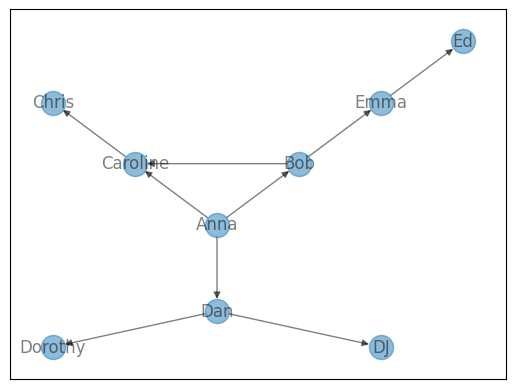

In [11]:
D = nx.DiGraph()
D.add_edges_from(relationships)
pos = nx.nx_agraph.graphviz_layout(D, prog="twopi")
nx.draw_networkx(D, pos, alpha=0.5)



### 2.1 Eigenvector centrality 

We are going to check whether we can get the simple eigenvector centrality measure for our digraph `D`. 


But first let's check how the matrix looks like.

In [12]:
A1 = nx.adjacency_matrix(D)
B1 = A1.toarray()
print(B1)

[[0 1 1 1 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


Examine the matrix. 
Remind yourself the equation for the eigenvector centrality measure (See: Newman 2010, Networks: An Introduction, p. 171). 
Do you see any possible problems?

Let's check the two functions, we've introduced above:

In [13]:
D_ec_n = nx.eigenvector_centrality_numpy(D) #This will give you an error


AmbiguousSolution: `eigenvector_centrality_numpy` does not give consistent results for disconnected graphs

Let's see what about the other method: 

In [ ]:
D_ec = nx.eigenvector_centrality(D) # This will give an error

So we get errors for both. However changing the number of iterations and tolerances will have influence on the results. Let's start with setting maximum number of iterations to 10000 for `eigenvector_centrality_numpy`

In [ ]:
D_ec_n = nx.eigenvector_centrality_numpy(D, max_iter=10000) # This will give you an error

What if we do the same for `eigenvector_centrality`:

In [ ]:
D_ec = nx.eigenvector_centrality(D, max_iter=10000) # This won't give you an error, and you can even print its results.
print("Eigenvector centrality for nodes in D:", D_ec)



So we actually got some results, but in 10000 iterations. 
You can change the max_item to 10000 and you'll still get an error. 

So after 10000 iterations, we get some results, but, that the values are extremely low. 
We can round them: 

In [ ]:
import math
rounded_data = {k: math.ceil(v * 100000) / 100000 for k, v in D_ec.items()}
print(rounded_data)


These values are so low, because our matrix had many rows of exclusively zeros (reflecting our graph, which has nodes with no in-coming edges). 

### You do not want to run this function any large network with nodes that only have outgoing edges. 

You can check whether the network is strongly connected to make sure what kind of network you're dealing with. 

As described in (See: Newman 2010, Networks: An Introduction, p. 171), an improved version of simple eigenvector measure is Katz Centrality, which basically allows us to gain insight into the structure of the network in much fewer iterations. 


### 2.2 Katz Centrality

We have learned that improved version of simple eigenvector measure is Katz Centrality, which gives all nodes some importance 'for free'. 

In NetwrokX we also have two functions that can calculate this measure for us:
-  `katz_centrality(G, alpha=0.1, beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight=None)` (documented here: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.katz_centrality.html)
- `katz_centrality_numpy(G, alpha=0.1, beta=1.0, normalized=True, weight=None)` (documented here: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.katz_centrality_numpy.html)




In [ ]:
D_kc_n = nx.katz_centrality_numpy(D)
print(D_kc_n)
D_kc = nx.katz_centrality(D)
print(D_kc)

In [ ]:
# Sort directly by value
sorted_kc = dict(sorted(D_kc.items(), key=lambda x: x[1], reverse=True))
sorted_kc_n = dict(sorted(D_kc_n.items(), key=lambda x: x[1], reverse=True))

print("\nKC:\n")
# Print the sorted results for ec
for node, centrality in sorted_kc.items():
    print(f"{node}: {centrality}")

print("\nKC_N:\n")
# Print the sorted results for ec
for node, centrality in sorted_kc_n.items():
    print(f"{node}: {centrality}")

So now we start seeing something interesting, if we compare degree centrality with Katz centrality. 
Anna's centrality has dropped from the first position to the last one.
Now Caroline and Chris are at the top of the list. 

Let's look at our digraph to understand why

In [ ]:
nx.draw_networkx(D)

Yes, Anna has exclusively outgoing links, so she is less important.
 
If we pretend for a second that this is a network of emails sent between co-workers, it would mean that Anna sends emails to a lot of people (Bob, Caroline, Dan), but they don't answer her. So she cannot that important. 

If we assume that it is a network representing sharing of SoMe posts, it would suggest that Anna shares posts written by a lot of different people (Bob, Caroline, Dan), but no one ever shares her posts. So again she's not that important. 

In the same scenario, Caroline posts are shared by other people (Bob and Anna), while Anna doesn't really help with Caroline's prestige in significant way due to her own low position, Bob does, as his posts are shared by Emma (and also Caroline herself), so Caroline is more important, as she can influence more people.

But why is Chris also important? Only Caroline shares his posts, just like only Dan shares posts by Dorothy, and only Emma shares posts by Ed etc., so why?

Well this is exactly why we use eigenvectors rather than simple in and out degrees, as it represents the structure of the entire network. Chris is influential, because his posts are shared by Caroline, who's influential herself. 

Let's compare his score with in and out degrees if other nodes:

In [ ]:
D_in_d = D.in_degree()
D_indc = nx.in_degree_centrality(D)

print("In-degrees for all nodes in D are:", D_in_d)
print("In-degree centrality for all nodes in D are", D_indc )

D_out_d = D.out_degree()
D_outdc = nx.out_degree_centrality(D)
print("Out-degrees for all nodes in D are:", D_out_d)
print("Out-degree centrality for all nodes in D are:", D_outdc)

print("\nCompare with kc:")
for node, centrality in sorted_kc_n.items():
    print(f"{node}: {centrality}")

### Question: In which scenario we might be interested in Anna? 



### 2.3 PageRank

Finally we've learned that even better version of eigenvector centrality measure is PageRank. 
The definition of this measure is closely connected to how the WWW is structured and it is a backbone of the good performance of Google search engine. 

However, it can be used to other networks as well to identify potentially interesting nodes. 

In NetworkX, there is a function `pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)` (documented here: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html)


 This measure will help us identify Chris as important player.




In [ ]:
D_pr = nx.pagerank(D)
print("D_pr:", D_pr)

sorted_pr= dict(sorted(D_pr.items(), key=lambda x: x[1], reverse=True))
print("Sorted by Page Rank:", sorted_pr)

print("\n PR :")
for node, centrality in sorted_pr.items():
    print(f"{node}: {centrality}")

print("Remember that max(D_pr) is not the right way to check what's the highest score or who has it, as the answer is always" , max(D_pr))

You might have noticed that with max 10000 iteration `eigenvector_centrality` also identified Chris as the most important node, but `pagerank` can find him within 100. 


## Exercise 3 Weight
In class we learned that in many cases weight is important for measuring prestige and influence. 
We've also learned that all NetworkX functions we introduced have an option to include weight as a variable in the calculation, by why is it useful.

Let's try to test it by a series of exercises inspired by Exercise 4.1 in Menczer, Fortunato, Davis, 2020, *A First Course in Network Science*. 

### Exercise 3.1 

Go to the French version of the Wikipedia article on 'network science' (https://fr.wikipedia.org/wiki/Science_des_réseaux).

We want to learn something about other Wikipedia pages (and other sources) to which this page points, so we are interested in the outgoing links of this page. 

How would you represent the relationships between this page and its sources if you were to create a network? Do not write any code yet, just think and make notes. 

Based on your modelling (and manual counting), what is the out-degree of this page in the Wikipedia network?


*Answers:* 



### Exercise 3.2 

Go to the English version of the Wikipedia article on 'network science' (en.wikipedia.org/wiki/Network_science). 

Using the same approach as in Ex 3.2, what is the out-degree of this page? 

What the difference tells us about the nature of these two pages? 

Do you have weights included in your model? 
If yes, what are they? Why did you include them? Why are they useful?

If no, can you include them? How, what would they be?  Why they might be useful? 


*Answers:* 



### Exercise 3.3 

Build two ego-networks for the articles (one for French 'Science_des_réseaux' and one for English 'Network_science').

The ego network consists of one node (the ego), all of its neighbors, and all of the links among them. The definition of a directed ego network is analogous, replacing neighbors by successors.

What is the node in the 'network science' ego network with the
maximum out-degree? And in 'Science des réseaux'? 

What is the node in the 'network science' ego network with the
maximum in-degree? And in 'Science des réseaux'? 







*Answers:*

In [ ]:
# Type your answers here.